### Given a topic research the latest news

In [1]:
import sys
sys.path.append('..')

from dotenv import load_dotenv
load_dotenv()

from utils import utils
utils.set_prefix("output/afterlife")

In [2]:
import glob
import json
import os
import torch
import yaml

from diffusers import DPMSolverMultistepScheduler, StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionUpscalePipeline
from langchain import LLMChain
from langchain.callbacks.manager import AsyncCallbackManagerForToolRun, CallbackManagerForToolRun
from langchain.prompts.chat import (ChatPromptTemplate, SystemMessagePromptTemplate, AIMessagePromptTemplate, HumanMessagePromptTemplate)
from langchain.tools import BaseTool
from PIL import Image
from python_on_whales import docker
from typing import Optional, Type
from utils import llms, utils
from xformers.ops import MemoryEfficientAttentionFlashAttentionOp


In [3]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
        utils.get_config(file="../config.yaml")["storyboard_artist"]["sd_model"],
        custom_pipeline="lpw_stable_diffusion",
        torch_dtype=torch.float16,
    )
pipe = pipe.to("cuda")

        

/home/muddyrumbles/git/aicp/venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:649: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


In [4]:
pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
#scheduler.config.algorithm_type = "sde-dpmsolver++"
#pipe.scheduler = scheduler


In [62]:
# settings
guidance_scale = 7.5
noise_strength = 0.75
num_inference_steps = 30 
num_images_per_prompt = 1
num_images_per_scene = 10
image_height = 1080 #864
image_width = 1920 #1536


In [63]:
positive_prompt = open("../prompts/storyboardartist_positive.txt", "r").read().strip()
negative_prompt = open("../prompts/storyboardartist_negative.txt", "r").read().strip()


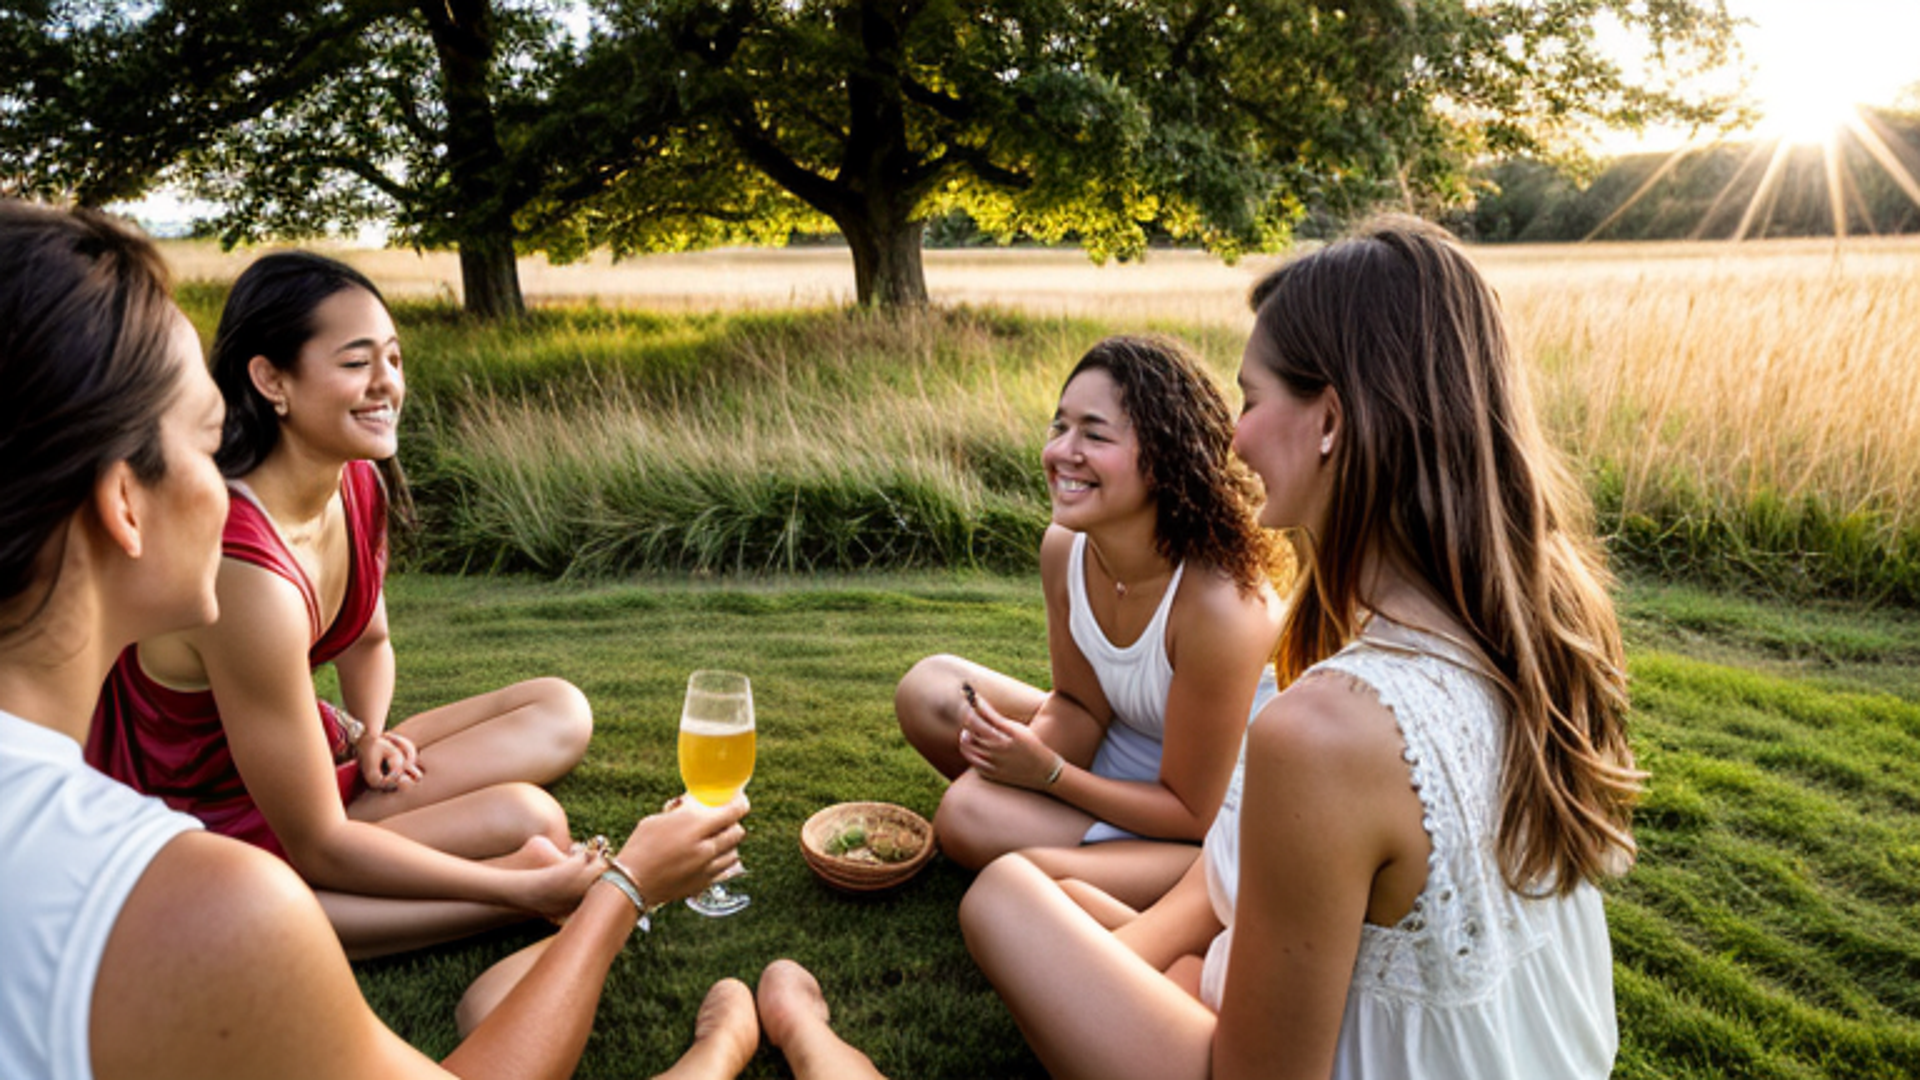

In [67]:
from PIL import Image
scene_image = Image.open("../output/summer-solstice/storyboard/scene_1_2.png").convert("RGB")
scene_image = scene_image.resize((image_width, image_height))
scene_image

  0%|          | 0/22 [00:00<?, ?it/s]

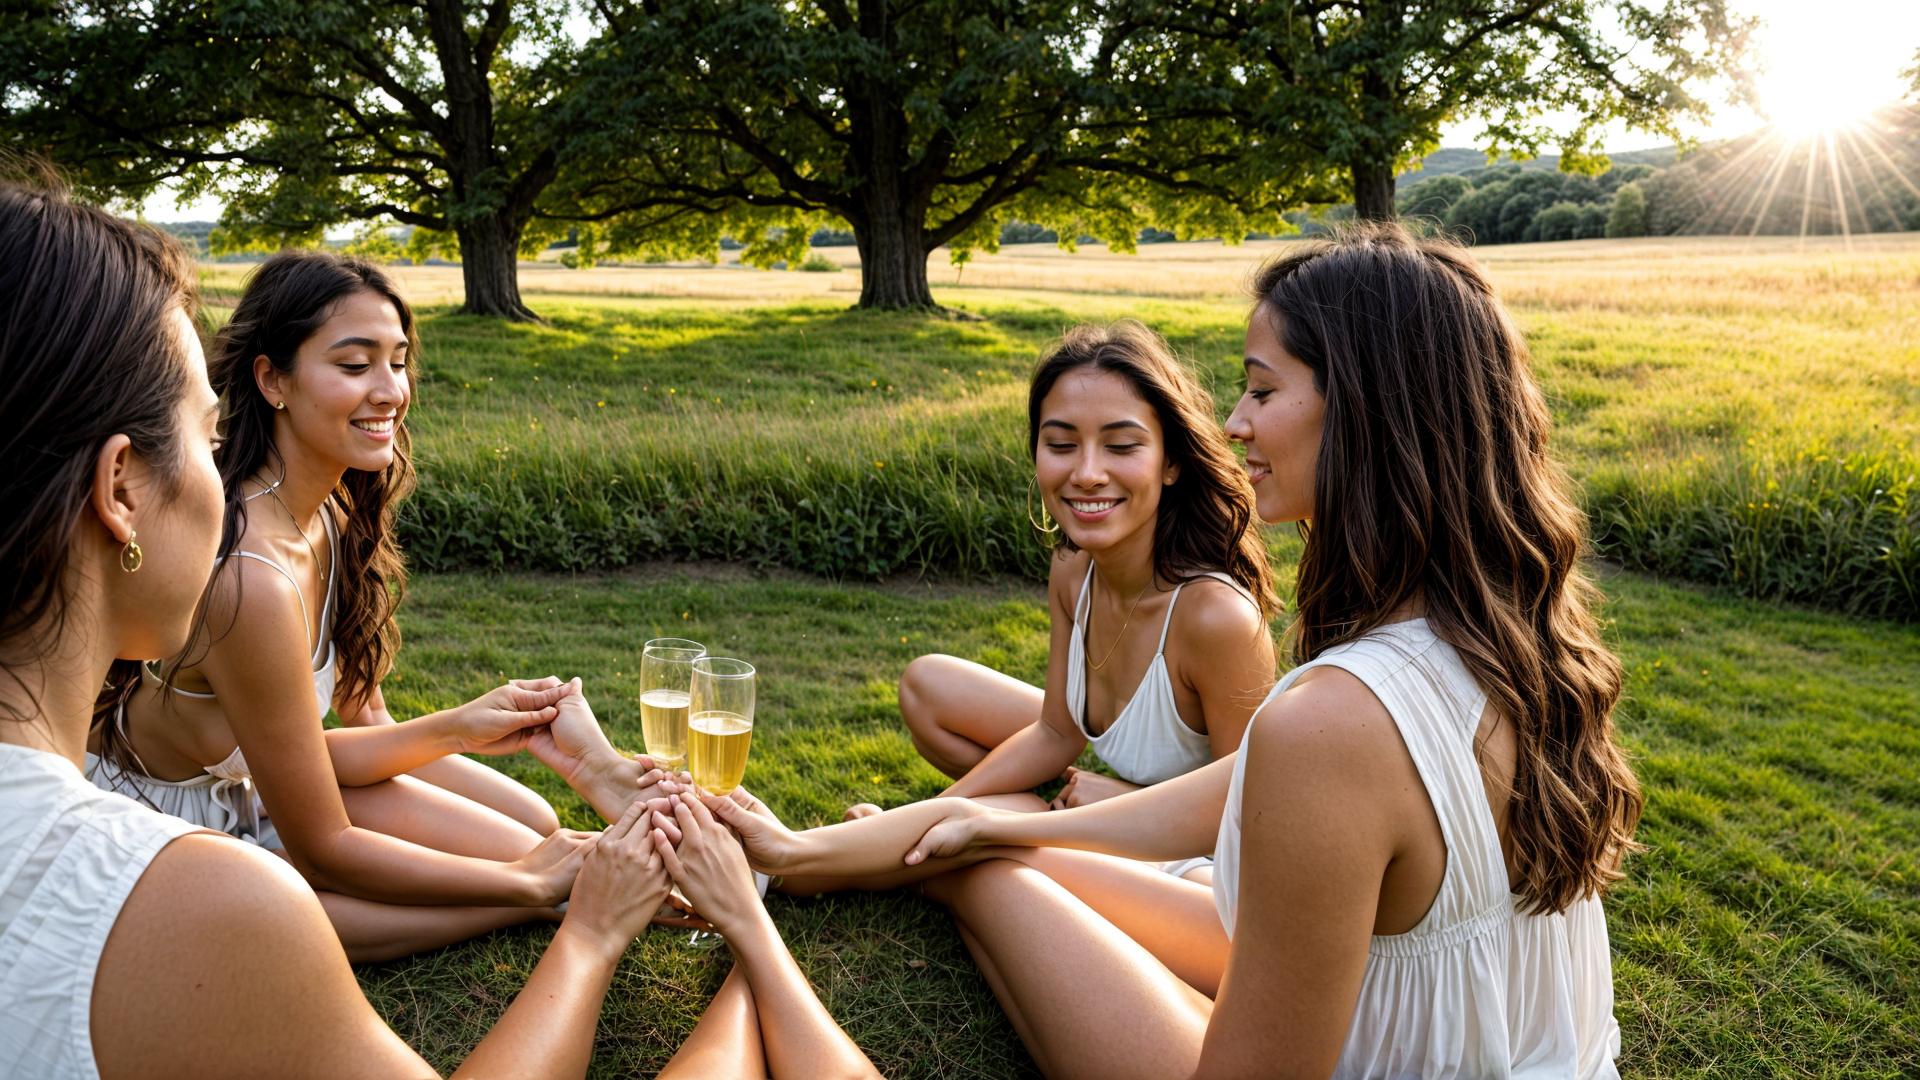

In [68]:
image = pipe(
    prompt="A detailed scene showcasing the summer solstice and its astronomical, cultural, and historical importance. The image should depict a vibrant summer landscape bathed in the golden glow of the sun. The background should include rolling hills, lush green fields, and a clear blue sky with wispy white clouds. A group of people gathered in a circle, holding hands and facing the sun, should be featured in the foreground, symbolizing the celebration of the summer solstice. The image style should be realistic, capturing the beauty and warmth of the season. (high detailed skin:1.2, high quality), reportage, journalism, 8k uhd, dslr ",
    negative_prompt=negative_prompt,
    image=scene_image,
    num_inference_steps=num_inference_steps,
    num_images_per_prompt=num_images_per_prompt,
    guidance_scale=guidance_scale,
    strength=noise_strength,
    width=image_width,
    height=image_height,
).images[0]
image